In [1]:
""" Principal do projeto. Aqui onde é executado todas as funções e análises. """
# -*- coding: UTF-8 -*- 
import pandas as pd
import re

import settings
import analysis

df = pd.read_excel("csv/Histórico dos Chamados.xlsx")

# Mudar nome das categorias e serviços pra evitar bug de diretório
df["CATEGORIA"] = [re.sub("/", "|", cat) for cat in df["CATEGORIA"]]
df["SERVICO"] = [re.sub("/", "|", str(ser)) for ser in df["SERVICO"]]

In [2]:
# Limpar um pouco as descrições
redutor = lambda phrase: str.lower(str(phrase))
df["DESCRICAO"] = df["DESCRICAO"].apply(redutor)

cleaner = lambda phrase: analysis.cleanTextPart1(phrase)
df["DESCRICAO"] = df["DESCRICAO"].apply(cleaner)

/home/bots/.local/lib/python3.7/site-packages/bs4/__init__.py:421: MarkupResemblesLocatorWarning: "http://marmitariapaladar.com.br/home" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning


In [3]:
qtd = 9
# Pegar as descrições dos top {qtd} serviços da top 1 categoria
categorias = df["CATEGORIA"].value_counts().index
dfCategoria = df[df["CATEGORIA"] == categorias[0]]
servicos = dfCategoria["SERVICO"].value_counts().index

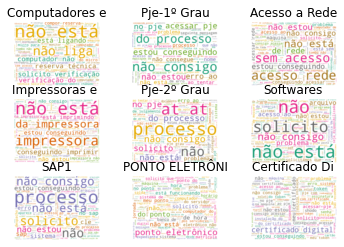

In [4]:
# Fazer nuvens das palavras mais utilizadas
allDescriptions = [dfCategoria[dfCategoria["SERVICO"] == servicos[i]]["DESCRICAO"]
                          for i in range(qtd)]
names = [servicos[i][:14] for i in range(qtd)]
cloud = analysis.makeWordCloud(allDescriptions, settings.STOP_WORDS, names)
cloud.show()

In [20]:
qtd = 2
# Pegar descrições resumidas que contiverem no minimo {qtd} tokens nelas
servico = servicos[1]
dfDesc = dfCategoria[dfCategoria["SERVICO"] == servico]["DESCRICAO"]

tokens = analysis.getFrequentTokens(dfDesc, settings.STOP_WORDS, quantity=12)
name_tokens = [x[0] for x in tokens]
count_tokens = [x[1] for x in tokens]

data = {"descriptions":analysis.getDescriptions(dfDesc, name_tokens, max_lenght=100)}
newDesc = pd.DataFrame(data)

analysis.saveToCsv(newDesc, "csv/teste/descrições/new - %s.csv"%servico)
dfTokens = pd.DataFrame({'token':name_tokens, 'count':count_tokens})
analysis.saveToCsv(dfTokens, "csv/teste/tokens/new - %s.csv"%servico)

print(len(dfDesc))
print(len(newDesc))

2028
722


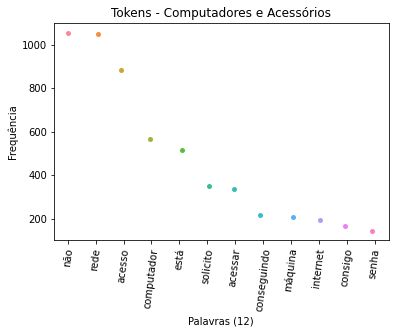

In [21]:
# Fazer um gráfico com as palavras comuns, pra ter ideia dos números
#maiorQue = 0.08 * len(allServiceDescriptions[index])
graph = analysis.makeWordStrippBar("Tokens - %s" % servicos[0],
                                   name_tokens, count_tokens)
graph.show()

In [29]:
# Analisar as ultimas 4 frases com cada token
for token, qt in tokens:
    print('%s (%s)'%(token, qt))
print('\n')
for token, qt in tokens:
    descr = [x for x in newDesc["descriptions"] if token in x]
    print(token, '(%d)'%qt)
    for des in descr[-4:]:
        print(des)
    print('\n------------------\n')

não (1054)
rede (1048)
acesso (882)
computador (566)
está (514)
solicito (352)
acessar (337)
conseguindo (217)
máquina (208)
internet (196)
consigo (166)
senha (146)


não (1054)
não consego acessar minha pasta de rede o vpn já foi instalado mas não consegui ver a pasta de dados
não estou conseguindo acessar word após retorno do pje por problemas com o provedor da cabo
bom dia não estou conseguindo o acesso à rede da dgi  a vpn está ativada e funcionando
 e  não está com acesso a  nas portas   

------------------

rede (1048)
a servidora salete isaías não consegue acesso à rede diz q a senha está bloqueada
não consego acessar minha pasta de rede o vpn já foi instalado mas não consegui ver a pasta de dados
bom dia não estou conseguindo o acesso à rede da dgi  a vpn está ativada e funcionando
solicito acesso a vpn para ter acesso ao arquivos de rede

------------------

acesso (882)
a servidora salete isaías não consegue acesso à rede diz q a senha está bloqueada
bom dia não estou conse

In [15]:
# Preparar os DataFrames em apenas um, em ordem crescente, pra treinar.
servicos = ["Computadores e Acessórios", "Acesso a Rede"]
df1 = pd.read_csv("csv/teste/descrições/new - Computadores e Acessórios.csv")
df1["intent"] = "Computadores e Acessórios"
df2 = pd.read_csv("csv/teste/descrições/new - Acesso a Rede.csv")
df2["intent"] = "Acesso a Rede"
df = df1.append(df2).reset_index(drop=True)